### Homework: Alternus Vera

###### Top 10 Features Selected

<br> 1. Reliable Source </br>
<br> 2. Political Affiliation </br>
<br> 3. Sensationalism </br>
<br> 4. Echo Chamber </br>
<br> 5. Social status </br>
<br> 6. Stance-based approach </br>
<br> 7. credibility values (users, posts, and news) </br>
<br> 8. truthfulness of the claims </br>
<br> 9. Domain/Individual/group credibility </br>
<br> 10. content credibility (image/video) </br>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import nltk
import nltk.corpus 
from nltk.tokenize import word_tokenize

As part of this exercise, used the dataset from 
"https://drive.google.com/open?id=1y3yYF5HHPhH7SyaPwPU9H5HApJzevsFK" to generate 

In [2]:
train_news = pd.read_csv('C://Users//Supreetha//Box Sync//MSSE//THIRD_SEM//257_ML//fake_news//liar_dataset//train.tsv',sep='\t')
test_news = pd.read_csv('C://Users//Supreetha//Box Sync//MSSE//THIRD_SEM//257_ML//fake_news//liar_dataset//test.tsv',sep='\t')
valid_news = pd.read_csv('C://Users//Supreetha//Box Sync//MSSE//THIRD_SEM//257_ML//fake_news//liar_dataset//valid.tsv',sep='\t')

In [3]:
columns = ['id', 'label', 'statement', 'subjects', 'speaker',
         'speaker_job', 'state', 'party', 'barely_true_counts',
         'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts',
         'context']
train_news.columns = columns
test_news.columns = columns
valid_news.columns = columns


In [4]:
train_news.head(5)

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
2,1123.json,FALSE,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
3,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
4,12465.json,TRUE,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece


In [5]:
test_news.head(5)

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference
1,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.
2,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show
3,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video
4,5962.json,true,Over the past five years the federal governmen...,"federal-budget,pensions,retirement",brendan-doherty,NaN,Rhode Island,republican,1,2,1,1,0,a campaign website


In [6]:
valid_news.head(5)

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN
1,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing
2,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article
3,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News
4,9416.json,false,Says when armed civilians stop mass shootings ...,guns,jim-rubens,Small business owner,New Hampshire,republican,1,1,0,1,0,"in an interview at gun shop in Hudson, N.H."


In [7]:
## ignore warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [8]:
train_news=train_news[['label','statement']]

In [9]:
train_news.head()

,label,statement
0,half-true,When did the decline of coal start? It started...
1,mostly-true,"Hillary Clinton agrees with John McCain ""by vo..."
2,FALSE,Health care reform legislation is likely to ma...
3,half-true,The economic turnaround started at the end of ...
4,TRUE,The Chicago Bears have had more starting quart...


In [10]:
#method to remove punctuations from textual data
import string
def remove_punctuation(statement):
    translator = str.maketrans('', '', string.punctuation)
    return statement.translate(translator)

In [11]:
#remove punctuations, convert text to lower case, remove words with less than 3 characters
train_news['statement'] = train_news['statement'].apply(remove_punctuation)
train_news['statement'] = train_news['statement'].str.lower()
train_news['statement'] = train_news.statement.apply(lambda i: ' '.join(filter(lambda j: len(j) > 3, i.split())))

In [12]:
train_news.label.unique()

array(['half-true', 'mostly-true', 'FALSE', 'TRUE', 'barely-true',
       'pants-fire'], dtype=object)

In [16]:
train_news['label']=np.where(train_news['label']=='half-true','true',train_news['label'])
train_news['label']=np.where(train_news['label']=='mostly-true','true',train_news['label'])
train_news['label']=np.where(train_news['label']=='barely-true','false',train_news['label'])
train_news['label']=np.where(train_news['label']=='pants-fire','false',train_news['label'])
train_news['label']=np.where(train_news['label']=='TRUE','true',train_news['label'])
train_news['label']=np.where(train_news['label']=='FALSE','false',train_news['label'])

In [17]:
train_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10268 entries, 0 to 10267
Data columns (total 2 columns):
label        10268 non-null object
statement    10268 non-null object
dtypes: object(2)
memory usage: 160.5+ KB


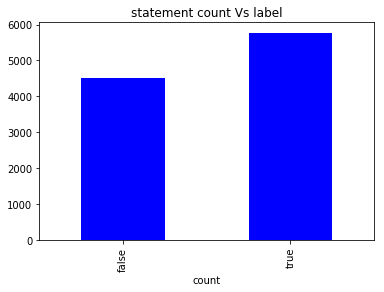

In [18]:
plt.title('statement count Vs label')
train_news.groupby(['label']).size().plot(kind='bar', color='blue')
plt.xlabel('count')
plt.show()


In [19]:
train_news.head()

,label,statement
0,true,when decline coal start started when natural t...
1,true,hillary clinton agrees with john mccain voting...
2,false,health care reform legislation likely mandate ...
3,true,economic turnaround started term
4,true,chicago bears have more starting quarterbacks ...


In [20]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

sw = stopwords.words('english')
stemmer = SnowballStemmer("english")

#Remove stop words
def remove_stopwords(statement):
    statement = [word.lower() for word in statement.split() if word.lower() not in sw]
    return " ".join(statement)

#Stemming
def stemming(statement):    
    statement = [stemmer.stem(word) for word in statement.split()]
    return " ".join(statement) 

<b> 1. Remove the stop words </b> 
<br><b> 2. Apply the stemmer </b></br>

In [21]:
train_news['statement'] = train_news['statement'].apply(remove_stopwords)
train_news['statement'] = train_news['statement'].apply(stemming)
train_news.head()

,label,statement
0,true,declin coal start start natur took start begin...
1,true,hillari clinton agre john mccain vote give geo...
2,false,health care reform legisl like mandat free cha...
3,true,econom turnaround start term
4,true,chicago bear start quarterback last year total...


In [24]:
import nltk
nltk.download('punkt')
from nltk import sent_tokenize
sentences = sent_tokenize(X[0])
print("\n sentences \n")
print(sentences[0])
# split into words
from nltk.tokenize import word_tokenize
tokens = word_tokenize(X[0])
print("\n NLTK SPLIT WORDS \n")
# remove all tokens that are not alphabetic
words = [word for word in tokens if word.isalpha()]
print("\n remove all tokens that are not alphabetic \n")
print(tokens[:100])
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words= stopwords.words('english')
print("\n stop_words\n")
print(stop_words)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Supreetha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!

 sentences 

declin coal start start natur took start begin presid georg bush administr

 NLTK SPLIT WORDS 


 remove all tokens that are not alphabetic 

['declin', 'coal', 'start', 'start', 'natur', 'took', 'start', 'begin', 'presid', 'georg', 'bush', 'administr']
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Supreetha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!

 stop_words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are'

<b>Count Vectorizer </b> 
<br>Counts the number of times each token shows up in dataset and uses this count as its weight. </br>


In [23]:
# Initialize a CountVectorizer object: count_vectorizer
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None)
X=train_news['statement']
y=train_news['label']
# Transforms the data into a bag of words
count_train = count_vec.fit(X.values)
bag_of_words = count_vec.transform(X.values)

# Print the first 10 features of the count_vec
print("Every feature:\n{}".format(count_vec.get_feature_names()))

Every feature:
['0809', '1000', '10000', '100000', '100000000', '100000the', '1000plus', '100billion', '100million', '100plus', '100round', '100th', '100watt', '100yearold', '1010', '1017', '102000', '103000', '1033', '1034', '104000', '10420', '1045', '106258', '1070', '10728', '10billion', '10in', '10million', '10percent', '10th', '10year', '10yearold', '1100', '11000', '11000squarefoot', '110billion', '110million', '110th', '11100', '111th', '112th', '1130', '113000', '115000', '116838763', '119000', '11collect', '11plus', '11th', '11yearold', '1200', '12000', '120000', '120member', '124000', '12500', '125000', '1270', '128000', '12808', '128300', '12million', '12th', '12year', '12yearold', '1300', '13000', '130000', '133000', '133600', '1336page', '134000', '135000', '1399', '13million', '13th', '13year', '1400', '14000', '140000', '141000', '141600', '142400', '143000', '144541', '14th', '1500', '15000', '150000', '1525', '153014', '1540', '1547', '15600', '15anhourpropos', '15bil

<b>TF-IDF Vectorizer </b>
<br>TF-IDF stands for “term frequency-inverse document frequency” </br>
The weight assigned to each token based on its frequency in a document and how recurrent that term is in the entire dataset

In [20]:
tf = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word')
txt_fitted = tf.fit(X.values)
txt_transformed = txt_fitted.transform(X.values)

In [21]:
tf.vocabulary_

{'declin': 2407,
 'coal': 1939,
 'start': 7441,
 'natur': 5329,
 'took': 7970,
 'begin': 1274,
 'presid': 6169,
 'georg': 3523,
 'bush': 1587,
 'administr': 730,
 'hillari': 3917,
 'clinton': 1918,
 'agre': 783,
 'john': 4377,
 'mccain': 4982,
 'vote': 8415,
 'give': 3554,
 'benefit': 1299,
 'doubt': 2698,
 'iran': 4272,
 'health': 3834,
 'care': 1686,
 'reform': 6494,
 'legisl': 4654,
 'like': 4724,
 'mandat': 4889,
 'free': 3393,
 'chang': 1792,
 'surgeri': 7651,
 'econom': 2805,
 'turnaround': 8112,
 'term': 7803,
 'chicago': 1831,
 'bear': 1256,
 'quarterback': 6331,
 'last': 4595,
 'year': 8704,
 'total': 7990,
 'number': 5494,
 'tenur': 7802,
 'faculti': 3100,
 'fire': 3239,
 'decad': 2394,
 'dunnam': 2769,
 'live': 4754,
 'district': 2634,
 'repres': 6568,
 'person': 5926,
 'stage': 7418,
 'work': 8657,
 'activ': 709,
 'pass': 5816,
 'along': 859,
 'russ': 6779,
 'feingold': 3173,
 'toughest': 7995,
 'ethic': 2991,
 'sinc': 7166,
 'waterg': 8483,
 'howev': 4011,
 'million': 5126

In [22]:
idf = tf.idf_
print(dict(zip(txt_fitted.get_feature_names(), idf)))

{'0809': 10.233959237574817, '1000': 7.055905407226871, '10000': 6.623041324930592, '100000': 6.427296747804497, '100000000': 10.233959237574817, '100000the': 10.233959237574817, '1000plus': 10.233959237574817, '100billion': 10.233959237574817, '100million': 9.540812057014872, '100plus': 10.233959237574817, '100round': 10.233959237574817, '100th': 10.233959237574817, '100watt': 10.233959237574817, '100yearold': 9.540812057014872, '1010': 8.624521325140716, '1017': 10.233959237574817, '102000': 10.233959237574817, '103000': 10.233959237574817, '1033': 10.233959237574817, '1034': 10.233959237574817, '104000': 10.233959237574817, '10420': 10.233959237574817, '1045': 10.233959237574817, '106258': 10.233959237574817, '1070': 9.540812057014872, '10728': 10.233959237574817, '10932json': 10.233959237574817, '10billion': 10.233959237574817, '10in': 10.233959237574817, '10million': 10.233959237574817, '10percent': 10.233959237574817, '10th': 8.624521325140716, '10year': 9.540812057014872, '10yea

In [ ]:
tfidf

<b>Word2Vec </b>

In [49]:
import gensim

model = gensim.models.Word2Vec (X.values, size=150, window=10, min_count=2, workers=10)
wv=model.train(X.values,total_examples=len(X.values),epochs=10)

In [50]:
print(model)

Word2Vec(vocab=38, size=150, alpha=0.025)
